In [59]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import anndata as anndata
import pathlib
import sys
import decoupler as dc
import scipy
import seaborn as sns

In [10]:
sample_name = 'OMIX002713'
use_fcgr1a = True

In [11]:
def calculate_and_plot_score(adata: anndata.AnnData, gene_list, score_name, **kwargs):
    sc.tl.score_genes(ad, gene_list = gene_list, score_name=score_name)
    sc.pl.spatial(ad, color = score_name, img_key=None, size = 1.6, save = '_{}.png'.format(score_name), return_fig = False, **kwargs)


In [12]:
database_path = pathlib.Path('../../../shared/databases/')

In [13]:
if use_fcgr1a:
    MAC_GENES = ['CD163', 'LYZ', 'FCGR1A'] # APOE'CD68' is expressed almost everywhere: 'MRC1' not enough
else:
    MAC_GENES = ['CD163', 'LYZ']

numof_genes = 150
KOvsWT_down_genelist = pd.read_csv(database_path / '{}_KO--over--WT_Down-Regulated.csv'.format(numof_genes), header=0).gene_name.str.upper()
KOvsWT_up_genelist = pd.read_csv(database_path / '{}_KO--over--WT_Up-Regulated.csv'.format(numof_genes), header=0).gene_name.str.upper()
KOvsWT_down_genelist = KOvsWT_down_genelist.str.upper()
KOvsWT_up_genelist = KOvsWT_up_genelist.str.upper()


In [14]:
print(len(KOvsWT_down_genelist))

150


In [15]:
sample_folder = pathlib.Path('../data/raw')

path_to_results = pathlib.Path('../') / 'results'
path_to_results.mkdir(parents=True, exist_ok=True)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white', figsize = (4,4), dpi_save=300, frameon = False, vector_friendly = False)
sc.settings.figdir = path_to_results
spatial_dot_size = 1.6
spot_size = 1.6
spatial_transparency = 1

scanpy==1.9.2 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 louvain==0.8.1 pynndescent==0.5.10


In [17]:
adata = sc.read(sample_folder / "OMIX002713.h5ad")

In [18]:
len(adata.obs['orig.ident'].cat.categories)

31

In [19]:
adata.obs['orig.ident'].cat.categories

Index(['0616Anew', '0616Bnew', '0804Bnew', 'G0414new', 'G0416new', 'G0507new',
       'G210809new', 'G210830A', 'G210909', 'G210924new', 'G211115Anew',
       'G211203_T', 'G211215new', 'G220110Anew', 'G220110Bnew', 'G220216',
       'G220223B', 'G220314', 'G220401', 'G220407', 'G220413', 'G220509',
       'G220518', 'G220526A_T', 'G220531', 'G220601T', 'G220622_T', 'G220624',
       'G221117Tnew', 'GN211122', 'id4109032new'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


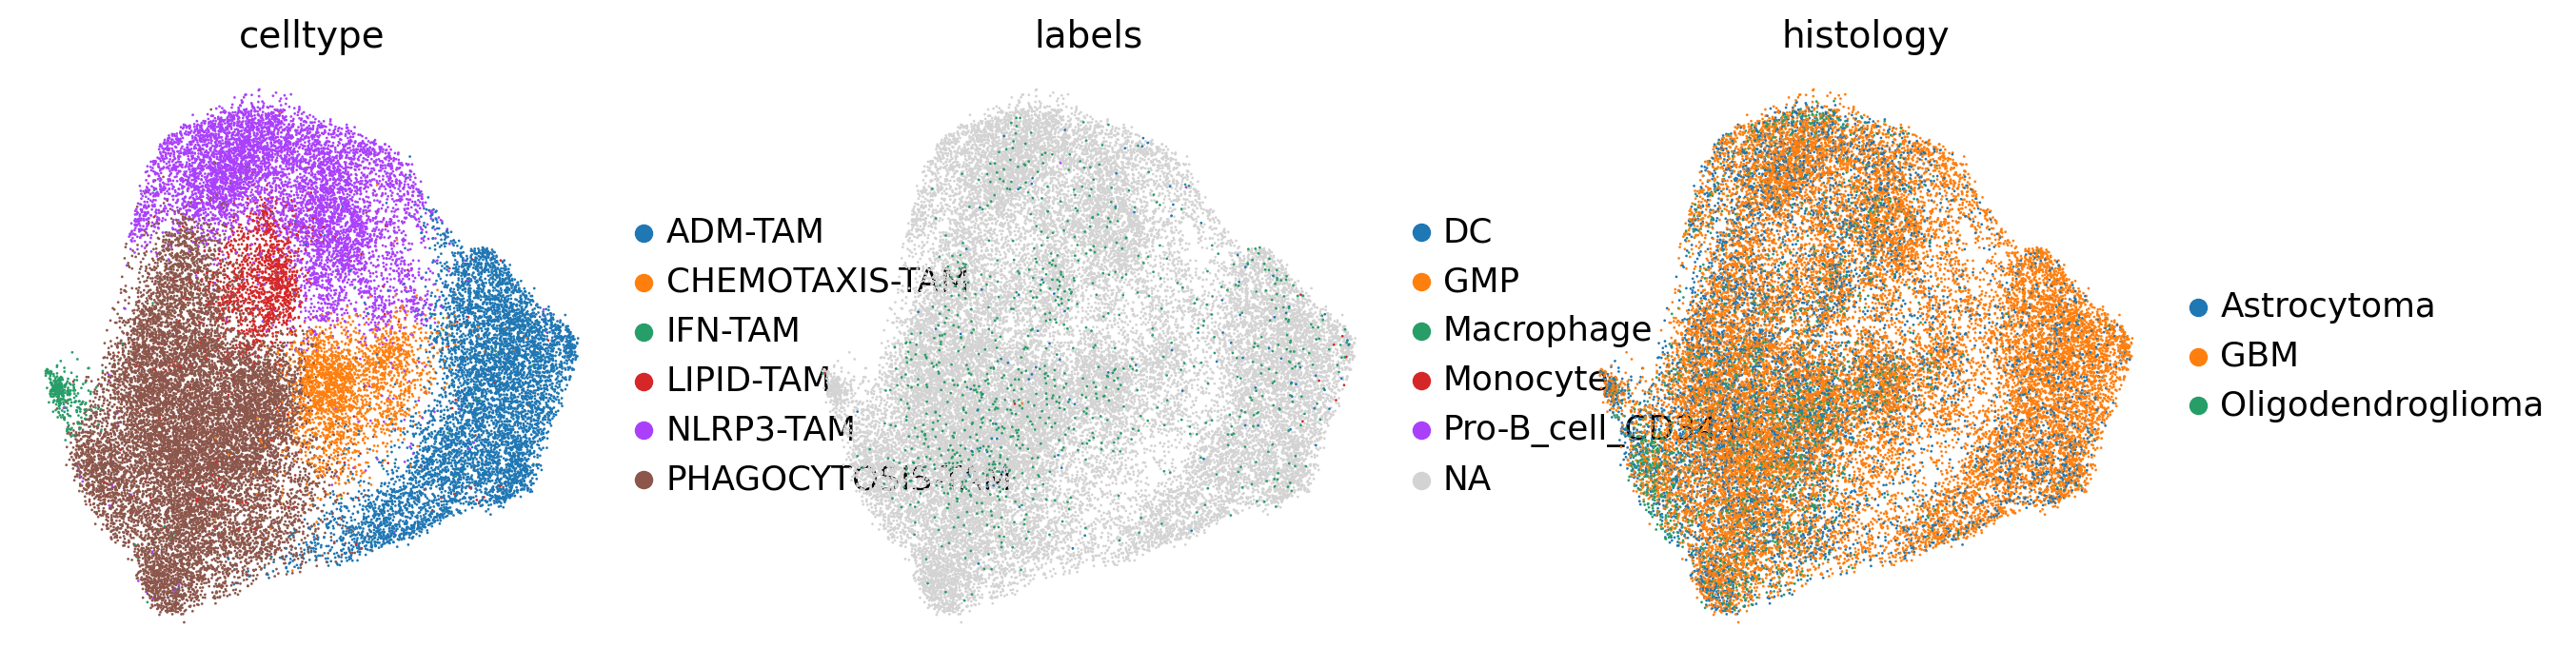

In [20]:
sc.pl.umap(adata, color = ['celltype', 'labels', 'histology'])

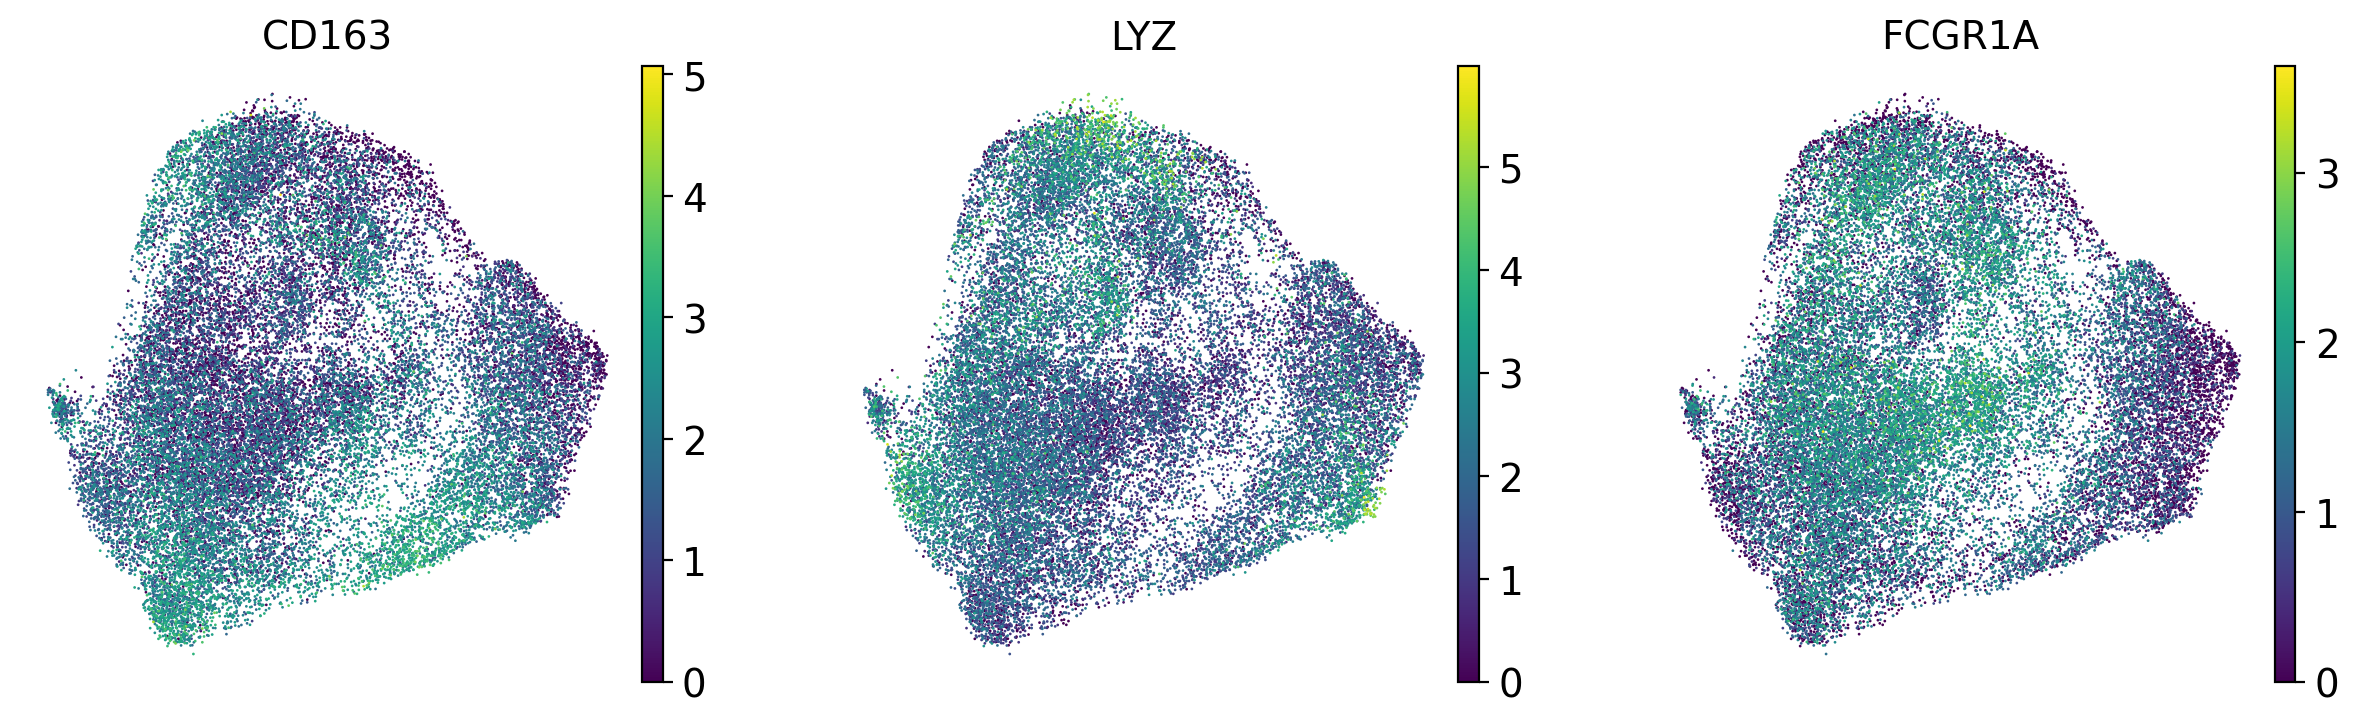

In [21]:
sc.pl.umap(adata, color = MAC_GENES)

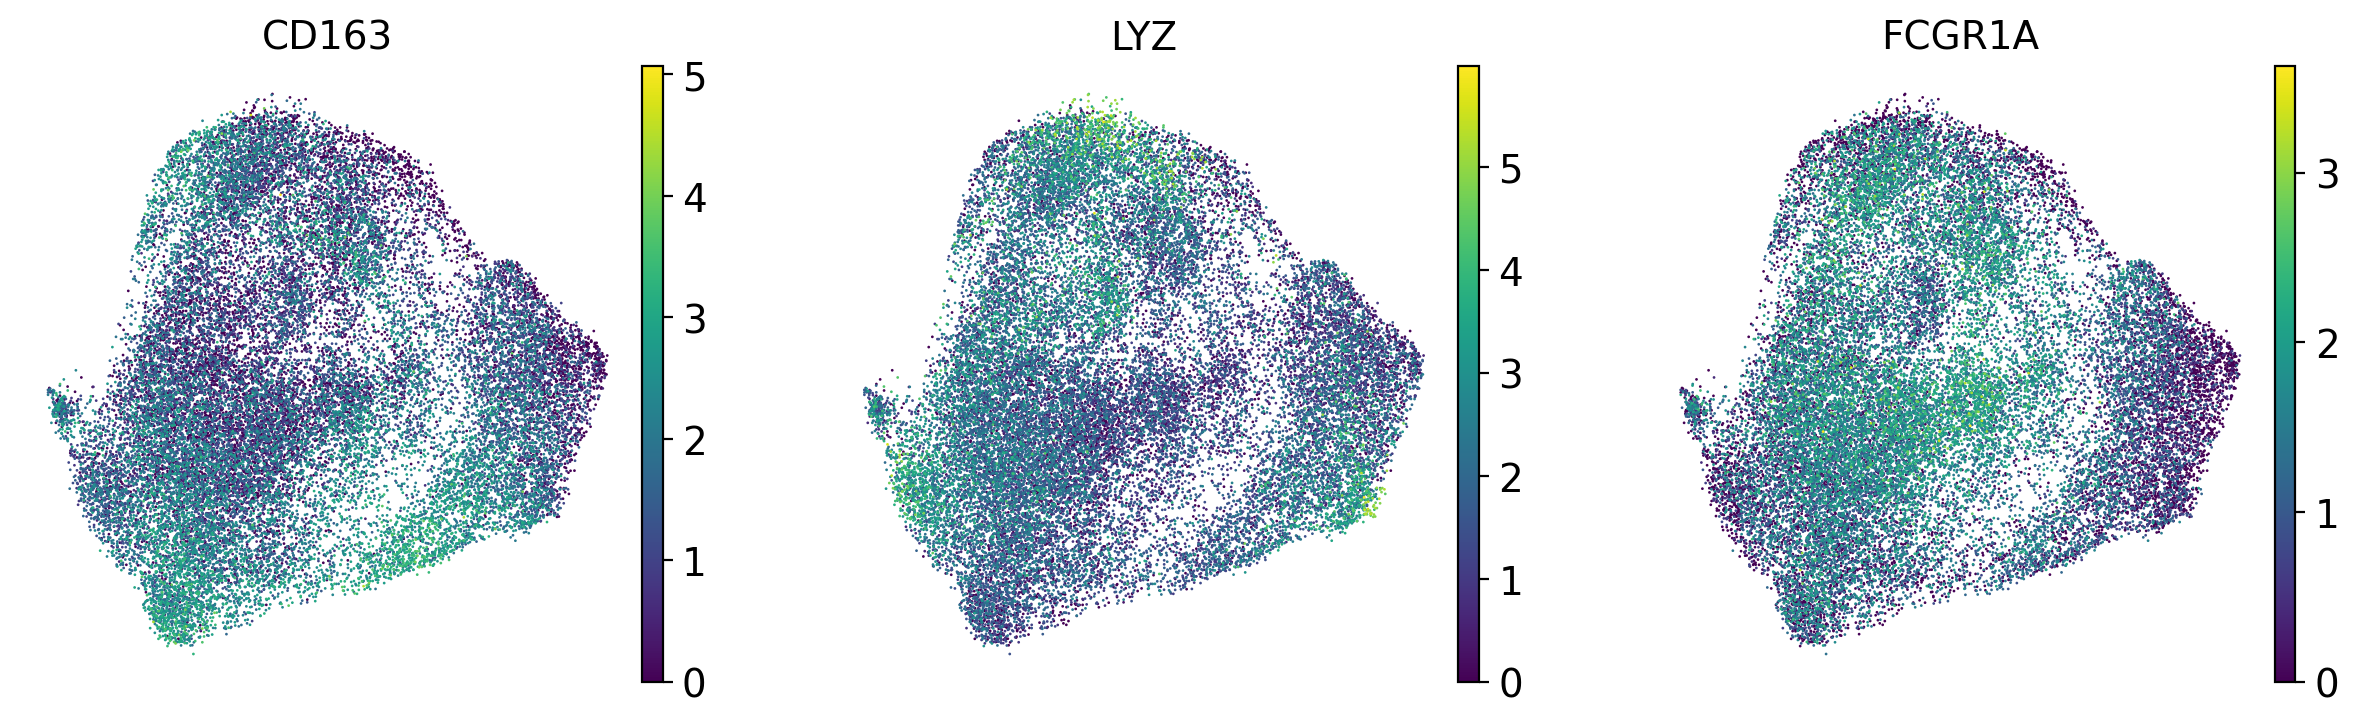

In [22]:
sc.pl.umap(adata, color = MAC_GENES)

In [23]:
sc.tl.score_genes(adata, gene_list=KOvsWT_down_genelist, score_name='KOvsWT_down_score')

computing score 'KOvsWT_down_score'
    finished: added
    'KOvsWT_down_score', score of gene set (adata.obs).
    788 total control genes are used. (0:00:03)


/opt/conda/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [24]:
sc.tl.score_genes(adata, gene_list=KOvsWT_up_genelist, score_name='KOvsWT_up_score')

computing score 'KOvsWT_up_score'
    finished: added
    'KOvsWT_up_score', score of gene set (adata.obs).
    1046 total control genes are used. (0:00:01)


/opt/conda/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


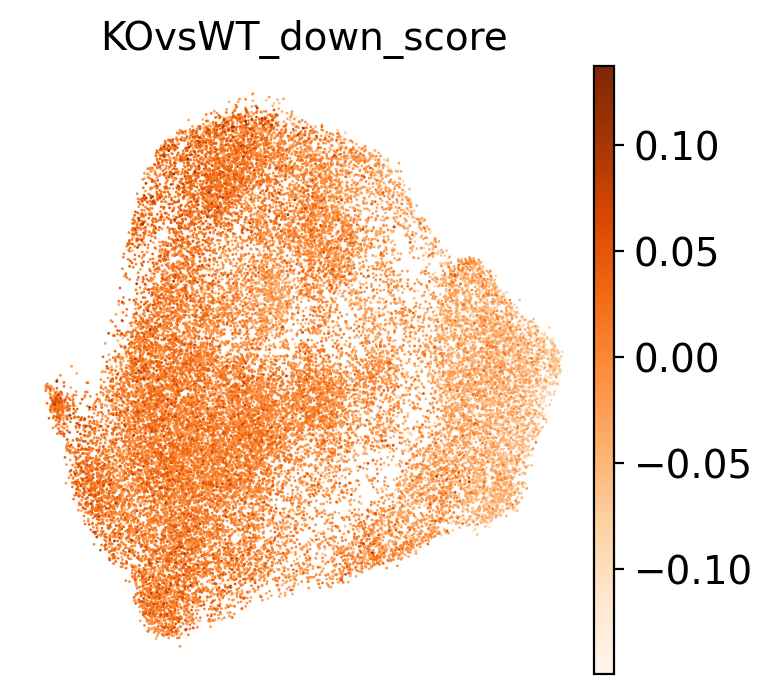

In [25]:
sc.pl.umap(adata, color = 'KOvsWT_down_score', cmap='Oranges')

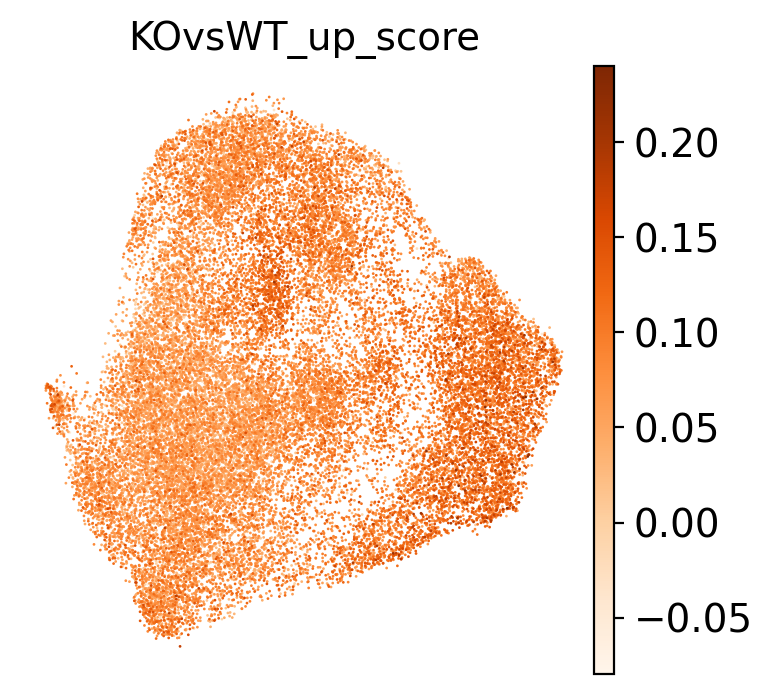

In [26]:
sc.pl.umap(adata, color = 'KOvsWT_up_score', cmap='Oranges')

In [27]:
adata.obs['KOvsWT_up_minus_down_score'] = adata.obs['KOvsWT_up_score'] - adata.obs['KOvsWT_down_score']

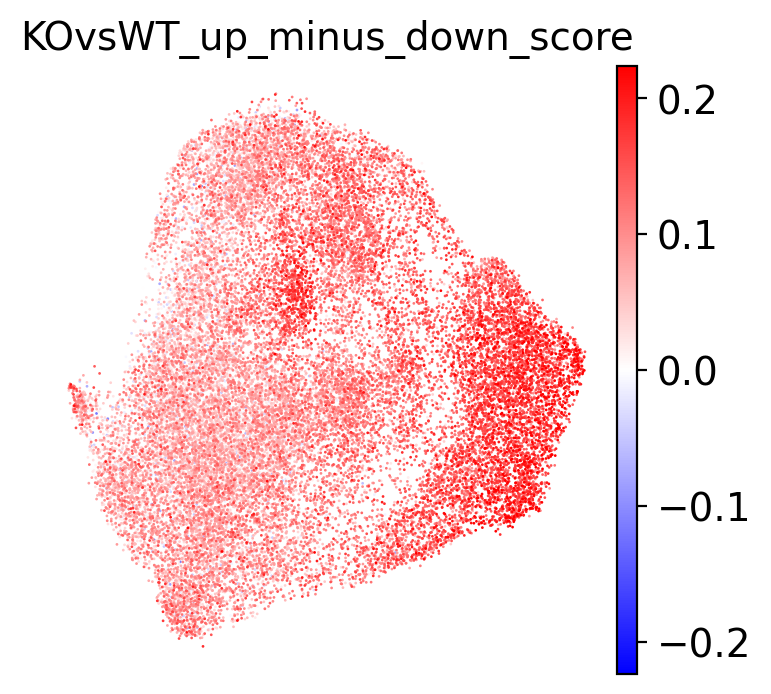

In [28]:
vmax = adata.obs['KOvsWT_up_minus_down_score'].abs().quantile(0.99)
vmin = -vmax
sc.pl.umap(adata, color = 'KOvsWT_up_minus_down_score', vmax = vmax, vmin = vmin, cmap='bwr')

# Fig 3F

In [29]:
df = sc.get.obs_df(adata, keys = ['SPP1', 'CXCL10', 'CD74'])

In [30]:
#define conditions
conditions = [
    (df['CXCL10'] > 0) & (df['SPP1'] > 0),
    (df['CXCL10'] > 0) & (df['SPP1'] == 0),
    (df['CXCL10'] == 0)& (df['SPP1'] > 0),
    (df['CXCL10'] == 0)& (df['SPP1'] == 0),
]

#define results
results = ['CXCL10 & SPP1', 'CXCL10', 'SPP1', 'none']

#create new column based on conditions in column1 and column2
adata.obs['CXCL10_SPP1'] = np.select(conditions, results)

In [31]:
Cxcl10_Spp1_colors= {'CXCL10':'#40E0D0', 'SPP1':'#FF1493', 'CXCL10 & SPP1': '#5D29A6', 'none': '#F2F2F2'}

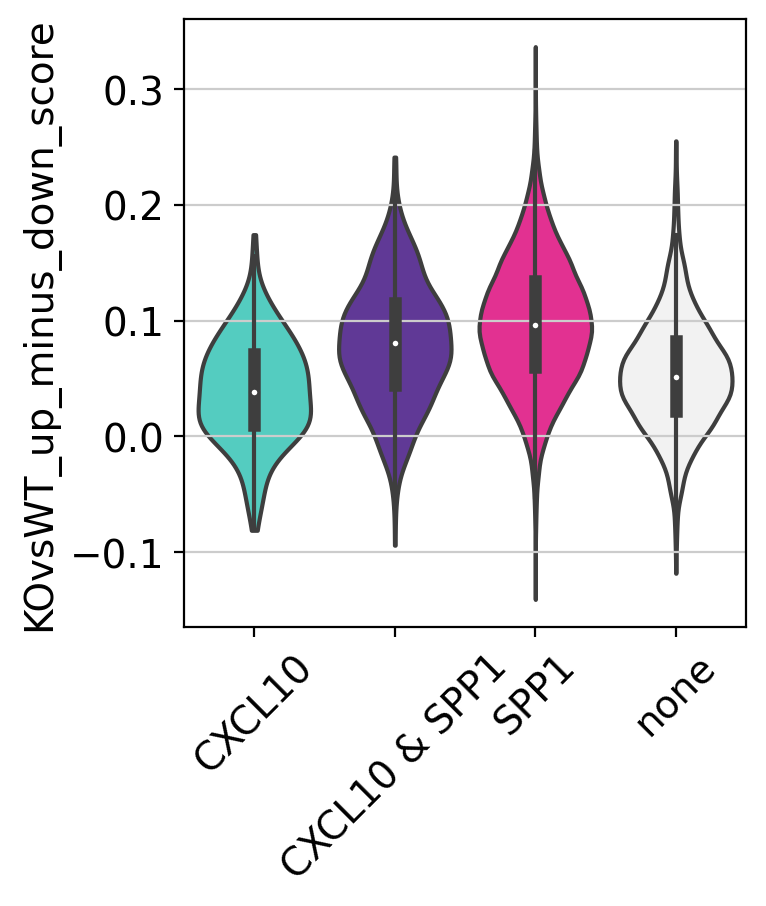

In [32]:
sc.pl.violin(adata, keys='KOvsWT_up_minus_down_score', groupby='CXCL10_SPP1',  palette = Cxcl10_Spp1_colors, stripplot = False, inner = 'box', rotation = 45)

In [33]:
#define conditions
conditions = [
    (df['CD74'] > 0) & (df['SPP1'] > 0),
    (df['CD74'] > 0) & (df['SPP1'] == 0),
    (df['CD74'] == 0)& (df['SPP1'] > 0),
    (df['CD74'] == 0)& (df['SPP1'] == 0),
]

#define results
results = ['CD74 & SPP1', 'CD74', 'SPP1', 'none']

#create new column based on conditions in column1 and column2
adata.obs['CD74_SPP1'] = np.select(conditions, results)

In [34]:
CD74_SPP1_colors= {'CD74':'#40E0D0', 'SPP1':'#FF1493', 'CD74 & SPP1': '#5D29A6', 'none': '#F2F2F2'}

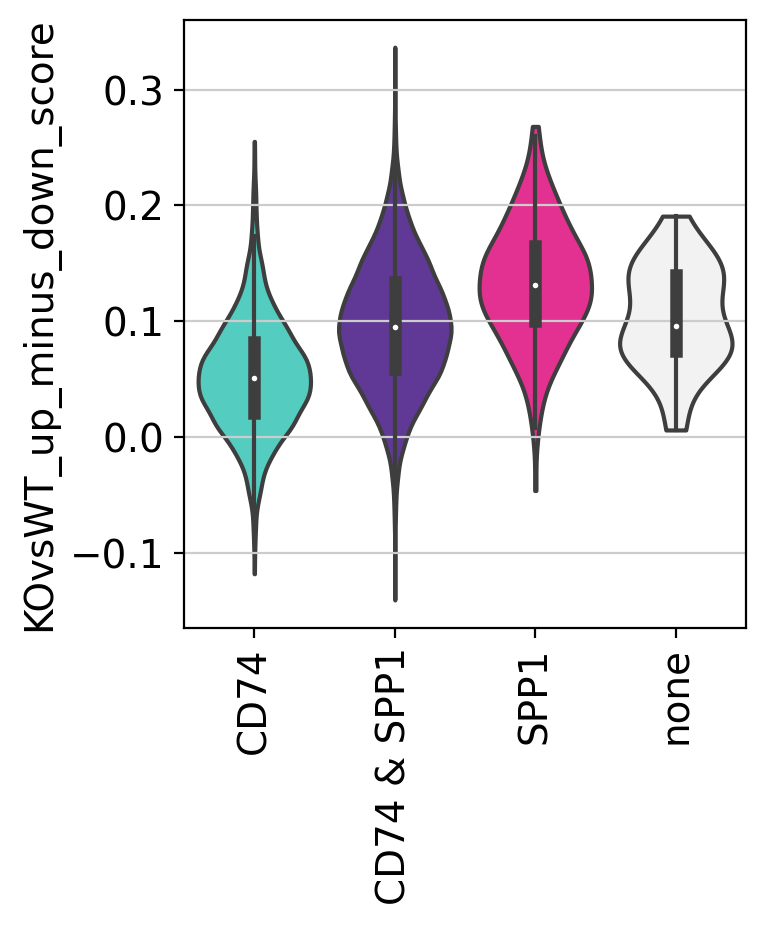

In [35]:
sc.pl.violin(adata, keys='KOvsWT_up_minus_down_score', groupby='CD74_SPP1', palette = CD74_SPP1_colors, stripplot = False, inner = 'box',rotation = 90)

In [36]:
msigdb = dc.get_resource('MSigDB')
msigdb

genesymbol                          collection  \
0             MAFF  chemical_and_genetic_perturbations   
1             MAFF  chemical_and_genetic_perturbations   
2             MAFF  chemical_and_genetic_perturbations   
3             MAFF                         immunesigdb   
4             MAFF  chemical_and_genetic_perturbations   
...            ...                                 ...   
3838543   PRAMEF22               go_biological_process   
3838544   PRAMEF22               go_biological_process   
3838545   PRAMEF22               go_biological_process   
3838546   PRAMEF22               go_biological_process   
3838547   PRAMEF22               go_biological_process   

                                                   geneset  
0                     BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN  
1                                       ELVIDGE_HYPOXIA_UP  
2                                 NUYTTEN_NIPP1_TARGETS_DN  
3                GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN  
4                   SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP  
...                                                    ...  
3838543  GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...  
3838544                             GOBP_APOPTOTIC_PROCESS  
3838545                      GOBP_REGULATION_OF_CELL_DEATH  
3838546  GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS  
3838547             GOBP_NEGATIVE_REGULATION_OF_CELL_DEATH  

[3838548 rows x 3 columns]

In [37]:
msigdb['collection'].unique()

['chemical_and_genetic_perturbations', 'immunesigdb', 'mirna_targets_mirdb', 'go_molecular_function', 'tf_targets_gtrf', ..., 'biocarta_pathways', 'positional', 'human_phenotype_ontology', 'pid_pathways', 'kegg_pathways']
Length: 22
Categories (22, string): [biocarta_pathways, cancer_gene_neighborhoods, cancer_modules, cell_type_signatures, ..., tf_targets_gtrf, tf_targets_legacy, vaccine_response, wikipathways]

In [38]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

genesymbol collection                           geneset
233           MAFF   hallmark      HALLMARK_IL2_STAT5_SIGNALING
250           MAFF   hallmark              HALLMARK_COAGULATION
270           MAFF   hallmark                  HALLMARK_HYPOXIA
373           MAFF   hallmark  HALLMARK_TNFA_SIGNALING_VIA_NFKB
377           MAFF   hallmark               HALLMARK_COMPLEMENT
...            ...        ...                               ...
1449668     STXBP1   hallmark      HALLMARK_PANCREAS_BETA_CELLS
1450315       ELP4   hallmark      HALLMARK_PANCREAS_BETA_CELLS
1450526        GCG   hallmark      HALLMARK_PANCREAS_BETA_CELLS
1450731      PCSK2   hallmark      HALLMARK_PANCREAS_BETA_CELLS
1450916       PAX6   hallmark      HALLMARK_PANCREAS_BETA_CELLS

[7318 rows x 3 columns]

In [39]:
msigdb.geneset = msigdb.geneset.str.replace('HALLMARK_', '')

In [40]:
msigdb

genesymbol collection                  geneset
233           MAFF   hallmark      IL2_STAT5_SIGNALING
250           MAFF   hallmark              COAGULATION
270           MAFF   hallmark                  HYPOXIA
373           MAFF   hallmark  TNFA_SIGNALING_VIA_NFKB
377           MAFF   hallmark               COMPLEMENT
...            ...        ...                      ...
1449668     STXBP1   hallmark      PANCREAS_BETA_CELLS
1450315       ELP4   hallmark      PANCREAS_BETA_CELLS
1450526        GCG   hallmark      PANCREAS_BETA_CELLS
1450731      PCSK2   hallmark      PANCREAS_BETA_CELLS
1450916       PAX6   hallmark      PANCREAS_BETA_CELLS

[7318 rows x 3 columns]

In [41]:
dc.run_aucell(adata, msigdb, source='geneset', target='genesymbol', use_raw=False)

In [42]:
terms = msigdb.geneset.unique()

In [43]:
adata.obsm['aucell_estimate']

source                                              ADIPOGENESIS  \
AAACGCTCATCTTAGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.081744   
AAACGCTGTCTTCCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.106109   
AAAGGATCAACTCGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.102219   
AAAGGATTCTTGGCTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.067009   
AAAGGGCCAAGACGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.080957   
...                                                          ...   
TTTACTGCACTTCATT-1                                      0.078738   
TTTCATGGTAACATCC-1                                      0.069143   
TTTCGATGTGGGAGAG-1                                      0.097515   
TTTGATCAGTGCCGAA-1                                      0.079436   
TTTGGTTTCAGTCAGT-1                                      0.070757   

source                                              ALLOGRAFT_REJECTION  \
AAACGCTCATCTTAGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0.138553   
AAACGCTGTCTTCCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0.176678   
AAAGGATCAACTCGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0.140790   
AAAGGATTCTTGGCTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0.147908   
AAAGGGCCAAGACGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1             0.146737   
...                                                                 ...   
TTTACTGCACTTCATT-1                                             0.130218   
TTTCATGGTAACATCC-1                                             0.142666   
TTTCGATGTGGGAGAG-1                                             0.145507   
TTTGATCAGTGCCGAA-1                                             0.127281   
TTTGGTTTCAGTCAGT-1                                             0.143320   

source                                              ANDROGEN_RESPONSE  \
AAACGCTCATCTTAGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           0.113247   
AAACGCTGTCTTCCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           0.085078   
AAAGGATCAACTCGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           0.100335   
AAAGGATTCTTGGCTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           0.099721   
AAAGGGCCAAGACGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1           0.085905   
...                                                               ...   
TTTACTGCACTTCATT-1                                           0.124410   
TTTCATGGTAACATCC-1                                           0.114296   
TTTCGATGTGGGAGAG-1                                           0.119259   
TTTGATCAGTGCCGAA-1                                           0.107047   
TTTGGTTTCAGTCAGT-1                                           0.140154   

source                                              ANGIOGENESIS  \
AAACGCTCATCTTAGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.087622   
AAACGCTGTCTTCCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.129464   
AAAGGATCAACTCGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.115569   
AAAGGATTCTTGGCTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.079226   
AAAGGGCCAAGACGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1      0.094524   
...                                                          ...   
TTTACTGCACTTCATT-1                                      0.061439   
TTTCATGGTAACATCC-1                                      0.117447   
TTTCGATGTGGGAGAG-1                                      0.095451   
TTTGATCAGTGCCGAA-1                                      0.069609   
TTTGGTTTCAGTCAGT-1                                      0.026409   

source                                              APICAL_JUNCTION  \
AAACGCTCATCTTAGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         0.068992   
AAACGCTGTCTTCCGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         0.073790   
AAAGGATCAACTCGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         0.093193   
AAAGGATTCTTGGCTC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         0.084416   
AAAGGGCCAAGACGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1         0.069423   
...                                                             ...   
TTTACTGCACTTCATT-1                                         0.067676   
TTTCATGGTAACATCC-1  

In [44]:
adata.obs[terms] = adata.obsm["aucell_estimate"][terms]

In [45]:
important_terms = ['TNFA_SIGNALING_VIA_NFKB', 'INFLAMMATORY_RESPONSE', 'ALLOGRAFT_REJECTION',
 'INTERFERON_GAMMA_RESPONSE',
 'INTERFERON_ALPHA_RESPONSE',
 'IL6_JAK_STAT3_SIGNALING']

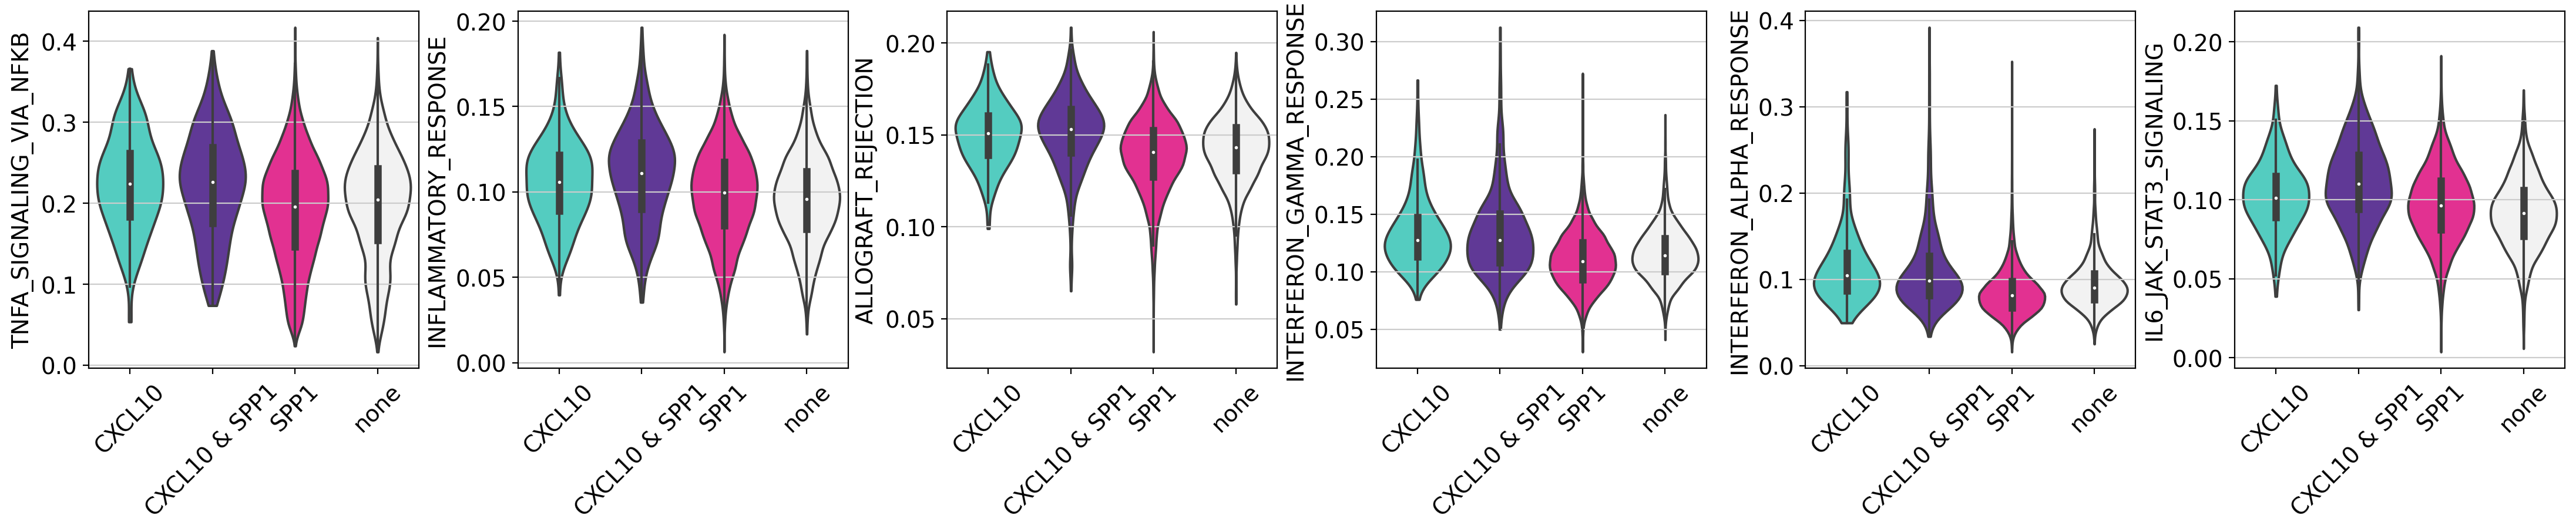

In [47]:
sc.pl.violin(adata, keys=important_terms, groupby='CXCL10_SPP1',  palette = Cxcl10_Spp1_colors, stripplot = False, inner = 'box', rotation = 45)

In [48]:
zscore_important_terms = [ term + '_zscore' for term in important_terms]

In [51]:
for term, zscore_term in zip(important_terms, zscore_important_terms):
    adata.obs[zscore_term] = scipy.stats.zscore(adata.obs[term])

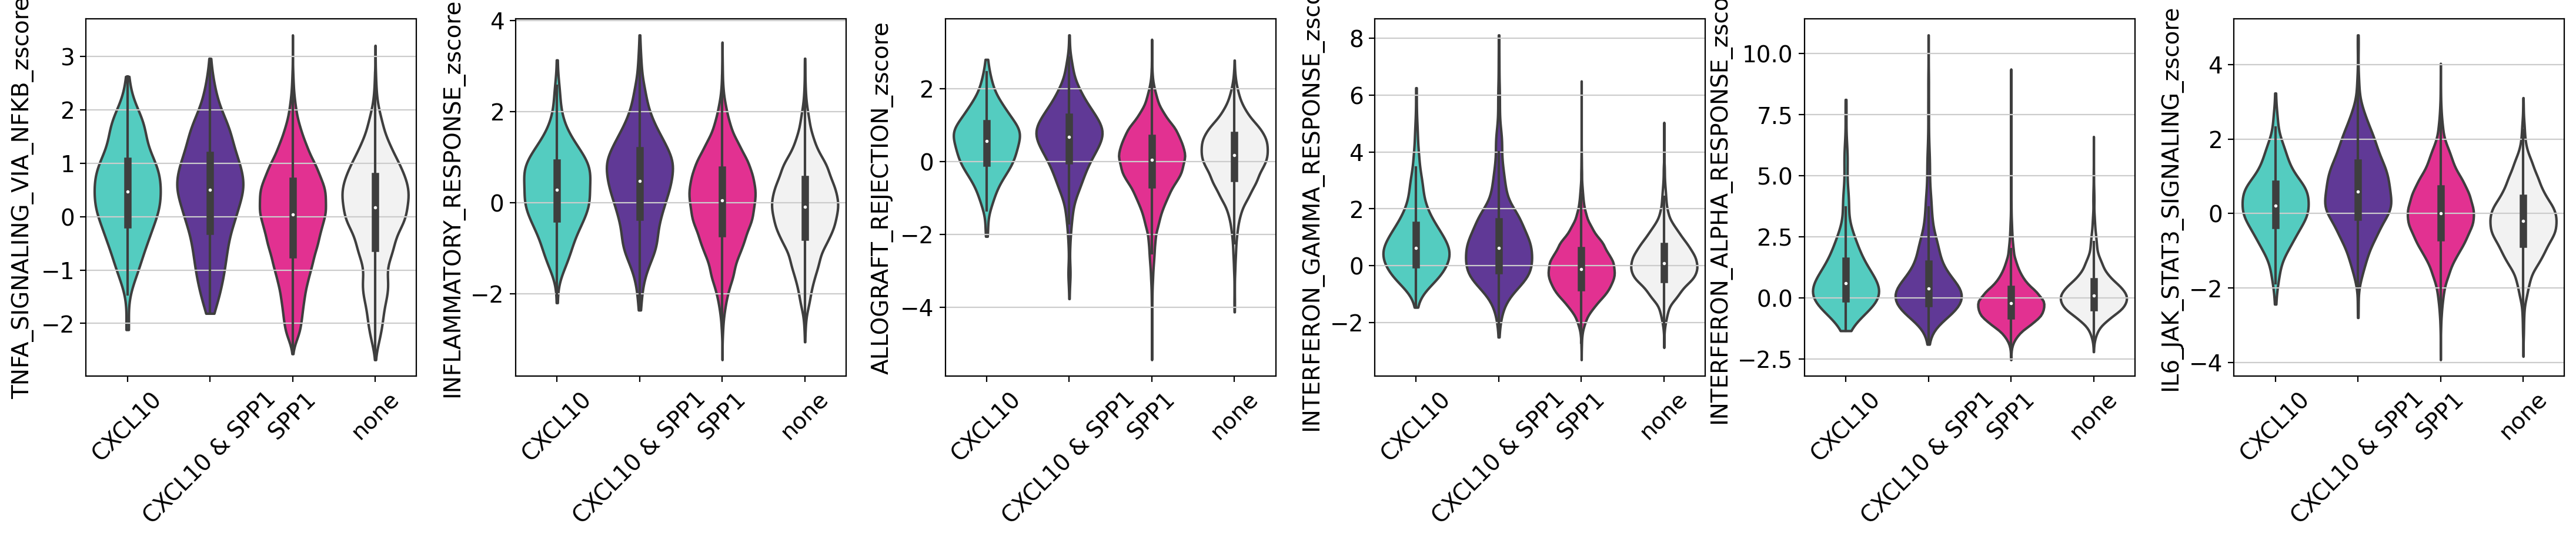

In [52]:
sc.pl.violin(adata, keys=zscore_important_terms, groupby='CXCL10_SPP1',  palette = Cxcl10_Spp1_colors, stripplot = False, inner = 'box', rotation = 45)

categories_order = sorted(ad_mac_tumor.obs['sample'].cat.categories.tolist(), key = lambda x: x.split('_Day')[1]) # sort by day

sc.pl.matrixplot(adata_tc, zscore_important_terms, categories_order= categories_order, groupby='sample', vcenter = 0, swap_axes=True, cmap='coolwarm')

sc.pl.dotplot(adata_tc, zscore_important_terms, categories_order= categories_order, groupby='sample', vcenter = 0, swap_axes=True, cmap='coolwarm')

In [53]:
important_terms_zscores_samples = sc.get.obs_df(adata, keys=zscore_important_terms + ['CXCL10_SPP1'])

In [54]:
mean_scores = important_terms_zscores_samples.groupby('CXCL10_SPP1').mean()

In [55]:
mean_scores_reset = mean_scores.reset_index()


In [56]:
mean_scores_long = mean_scores_reset.melt(
    id_vars='CXCL10_SPP1',
    var_name='Pathway',
    value_name='mean_zscore'
)

In [57]:
mean_scores_long

CXCL10_SPP1                           Pathway  mean_zscore
0          CXCL10    TNFA_SIGNALING_VIA_NFKB_zscore     0.463368
1   CXCL10 & SPP1    TNFA_SIGNALING_VIA_NFKB_zscore     0.436230
2            SPP1    TNFA_SIGNALING_VIA_NFKB_zscore    -0.033522
3            none    TNFA_SIGNALING_VIA_NFKB_zscore     0.056864
4          CXCL10      INFLAMMATORY_RESPONSE_zscore     0.267426
5   CXCL10 & SPP1      INFLAMMATORY_RESPONSE_zscore     0.434906
6            SPP1      INFLAMMATORY_RESPONSE_zscore     0.006421
7            none      INFLAMMATORY_RESPONSE_zscore    -0.122780
8          CXCL10        ALLOGRAFT_REJECTION_zscore     0.525867
9   CXCL10 & SPP1        ALLOGRAFT_REJECTION_zscore     0.576993
10           SPP1        ALLOGRAFT_REJECTION_zscore    -0.049921
11           none        ALLOGRAFT_REJECTION_zscore     0.106557
12         CXCL10  INTERFERON_GAMMA_RESPONSE_zscore     0.886014
13  CXCL10 & SPP1  INTERFERON_GAMMA_RESPONSE_zscore     0.850406
14           SPP1  INTERFERON_GAMMA_RESPONSE_zscore    -0.071758
15           none  INTERFERON_GAMMA_RESPONSE_zscore     0.142354
16         CXCL10  INTERFERON_ALPHA_RESPONSE_zscore     0.961701
17  CXCL10 & SPP1  INTERFERON_ALPHA_RESPONSE_zscore     0.828829
18           SPP1  INTERFERON_ALPHA_RESPONSE_zscore    -0.093602
19           none  INTERFERON_ALPHA_RESPONSE_zscore     0.246285
20         CXCL10    IL6_JAK_STAT3_SIGNALING_zscore     0.265087
21  CXCL10 & SPP1    IL6_JAK_STAT3_SIGNALING_zscore     0.639923
22           SPP1    IL6_JAK_STAT3_SIGNALING_zscore     0.013825
23           none    IL6_JAK_STAT3_SIGNALING_zscore    -0.194570

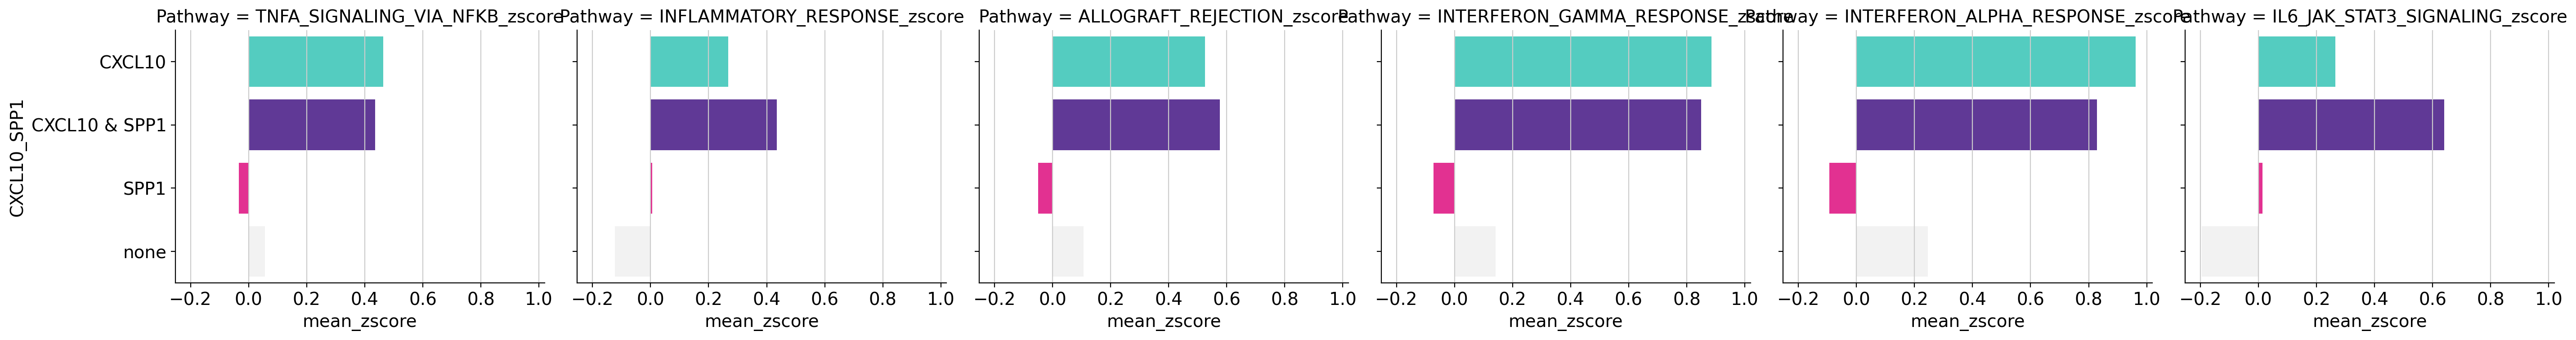

In [61]:
facet_grid = sns.catplot(
    data=mean_scores_long,
    y='CXCL10_SPP1',
    x= 'mean_zscore',
    #hue='day',
    col='Pathway',
    kind='bar',
    orient='h',
    height=4,
    aspect=1.2,
   # order = stim_order,
   palette= Cxcl10_Spp1_colors
)
facet_grid.savefig(path_to_results / 'barplot_mean_zscores.pdf')